## **Data Analysis for Electronic Sales** ##

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as op


In [307]:
# Loading the data set fron the excel sheet
sales= pd.read_excel("electronic_sales.xlsx")

In [308]:
# viewing the dataset
sales

# viewing the data types of each column
sales.dtypes


Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
dtype: object

In [309]:
# renaming the column names to all lower case and replacing space with underscore
e_sales = sales.rename(columns=lambda  x: x.strip().lower().replace(" ", "_"))

# viewing the e_sales data type
e_sales.dtypes

date           datetime64[ns]
branch                 object
sales_agent            object
products               object
units                   int64
price                 float64
dtype: object

In [310]:
# creating the revenue column in the data set
e_sales["revenue"]= e_sales["units"] * e_sales["price"]
e_sales

# displaying the parameter for the revenue column in thousands round(parameter, 2)
e_sales["revenue(₦)"] = round(e_sales["units"]* e_sales["price"] * 1000, 2)
e_sales


,date,branch,sales_agent,products,units,price,revenue,revenue(₦)
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0
5,2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539.73,539730.0
6,2014-10-05,Woji,George,HP,28,8.99,251.72,251720.0
7,2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0
8,2014-02-09,Woji,Tolu,Lenovo,36,4.99,179.64,179640.0
9,2015-08-07,Woji,Emeka,Dell,42,23.95,1005.90,1005900.0


In [311]:
# converting the date column to datetime

# e_sales["date"]= pd.to_datetime(e_sales["date"])

# extracting the week_day, month and year from the date column
e_sales["year"]= e_sales['date'].dt.year
e_sales["month"] = e_sales["date"].dt.month_name()
e_sales["week_day"] = e_sales["date"].dt.day_name()

e_sales.head()

,date,branch,sales_agent,products,units,price,revenue,revenue(₦),year,month,week_day
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday


## **Working on the KPI's** ##

In [312]:
# Total Electronics units sold
total_units_sold = e_sales["units"].sum()
print(f"Total units sold: {total_units_sold}")

Total units sold: 2121


Total Revenue

In [313]:
# Total revenue
total_revenue = e_sales["revenue(₦)"].sum()
print(f"The Total Revenue generated from the electronic sales is {total_revenue:,} ")

The Total Revenue generated from the electronic sales is 19,627,880.0 


In [314]:
# Average revenue per unit
# using round() to approximate to 2 decimal places
avrg_revenue_per_unit = round(total_revenue/total_units_sold, 2)
print(f"The Average Revenue generated per unit sale is: ₦{avrg_revenue_per_unit:,}")

The Average Revenue generated per unit sale is: ₦9,254.07


In [315]:
# number of products using nunique() to show the number of unique values
no_of_unique_products  = e_sales["products"].nunique()
print(f"Total Number of Products: {no_of_unique_products}")


# showing the list of unique products using unique()
name_of_products  = e_sales["products"].unique()
print(f"Name of Products: {name_of_products}")



Total Number of Products: 5
Name of Products: ['Apple' 'Lenovo' 'HP' 'Compaq' 'Dell']


In [316]:
# number of Sales Agents using nunique()
no_of_sales_agent  = e_sales["sales_agent"].nunique()
print(f"Total Number of Sales Agents: {no_of_sales_agent}")


# showing the list of sales agents names
name_of_sales_agent  = e_sales["sales_agent"].unique()
print(f"Names of Sales Agents: {name_of_sales_agent}")

Total Number of Sales Agents: 11
Names of Sales Agents: ['Chinedu' 'Emeka' 'Ibrahim' 'Tolu' 'Tonye' 'George' 'Blessing' 'Chioma'
 'Torbari' 'Uche' 'Tunde']


## **Working on the Insight** ##

In [317]:
# using the date columns as the index
e_sales.set_index("date", inplace=True)
e_sales

,branch,sales_agent,products,units,price,revenue,revenue(₦),year,month,week_day
date,,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539.73,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251.72,251720.0,2014,October,Sunday
2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0,2015,December,Monday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179.64,179640.0,2014,February,Sunday


In [318]:
# number of unique Year(s) in the data set
e_sales.year.unique()



array([2014, 2015], dtype=int32)

In [319]:
# display the sales for 2014 only
e_sales_2014 = e_sales[e_sales["year"] == 2014]
e_sales_2014

,branch,sales_agent,products,units,price,revenue,revenue(₦),year,month,week_day
date,,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539.73,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251.72,251720.0,2014,October,Sunday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179.64,179640.0,2014,February,Sunday
2014-01-23,Woji,Emeka,HP,50,19.99,999.50,999500.0,2014,January,Thursday
2014-12-12,Woji,Chinedu,Lenovo,67,1.29,86.43,86430.0,2014,December,Friday
2014-04-18,Woji,Tonye,Lenovo,75,1.99,149.25,149250.0,2014,April,Friday
2014-05-05,Woji,Tolu,Lenovo,90,4.99,449.10,449100.0,2014,May,Monday
2014-06-25,Woji,George,Lenovo,90,4.99,449.10,449100.0,2014,June,Wednesday


In [320]:
# display the sales for 2015 only
e_sales_2015 = e_sales[e_sales["year"] == 2015]
e_sales_2015

,branch,sales_agent,products,units,price,revenue,revenue(₦),year,month,week_day
date,,,,,,,,,,
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday
2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0,2015,December,Monday
2015-08-07,Woji,Emeka,Dell,42,23.95,1005.90,1005900.0,2015,August,Friday
2015-01-15,Woji,Ibrahim,HP,46,8.99,413.54,413540.0,2015,January,Thursday
2015-03-24,Woji,Tolu,Dell,50,4.99,249.50,249500.0,2015,March,Tuesday
2015-05-14,Woji,Ibrahim,Lenovo,53,1.29,68.37,68370.0,2015,May,Thursday


## **Total Revenue by month**

In [321]:
# using .sortindex() to arrange the ouput based on the index
monthly_revenue_2014 = e_sales_2014.groupby("month")["revenue(₦)"].sum().sort_index()
monthly_revenue_2014 

month
April         448650.0
August        174650.0
December     1269690.0
February      719370.0
January      1188550.0
July         1676900.0
June          988500.0
March         167440.0
May           512780.0
November      778890.0
October       827080.0
September     505840.0
Name: revenue(₦), dtype: float64

In [322]:
# using .sortindex() to arrange the ouput based on the index
monthly_revenue_2015 = e_sales_2015.groupby("month")["revenue(₦)"].sum().sort_index()
monthly_revenue_2015 

month
April         610380.0
August       1830900.0
December     2018780.0
February     1324960.0
January       413540.0
July          996330.0
June          625000.0
March         389430.0
May           787570.0
November       54890.0
October      1157490.0
September     160270.0
Name: revenue(₦), dtype: float64

In [323]:
# using .sortindex() to arrange the ouput based on the index
total_monthly_revenue = e_sales.groupby("month")["revenue(₦)"].sum().sort_index()
total_monthly_revenue 

month
April        1059030.0
August       2005550.0
December     3288470.0
February     2044330.0
January      1602090.0
July         2673230.0
June         1613500.0
March         556870.0
May          1300350.0
November      833780.0
October      1984570.0
September     666110.0
Name: revenue(₦), dtype: float64

In [324]:
# using sort.values() to arrange the output based on the values for 2014 (low to high)
monthly_revenue_2014= e_sales_2014.groupby("month")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"Monthly Revenue for 2014 in ascending order: \n, {monthly_revenue_2014}")


Monthly Revenue for 2014 in ascending order: 
, month
March         167440.0
August        174650.0
April         448650.0
September     505840.0
May           512780.0
February      719370.0
November      778890.0
October       827080.0
June          988500.0
January      1188550.0
December     1269690.0
July         1676900.0
Name: revenue(₦), dtype: float64


In [325]:
# using sort.values() to arrange the output based on the values for 2015 (low to high)
monthly_revenue_2015= e_sales_2015.groupby("month")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"Monthly Revenue for 2015 in ascending order: \n, {monthly_revenue_2015}")

Monthly Revenue for 2015 in ascending order: 
, month
November       54890.0
September     160270.0
March         389430.0
January       413540.0
April         610380.0
June          625000.0
May           787570.0
July          996330.0
October      1157490.0
February     1324960.0
August       1830900.0
December     2018780.0
Name: revenue(₦), dtype: float64


In [326]:
# using .sort_value() to to arrange the output based on the values for the 20i4 and 2015
total_monthly_revenue= e_sales.groupby("year")['revenue(₦)'].sum().sort_values(ascending=True)
total_monthly_revenue

year
2014     9258340.0
2015    10369540.0
Name: revenue(₦), dtype: float64

`Data visualization for revenue by month using bar chart in pandas` 

<Axes: xlabel='month', ylabel='revenue(₦)'>

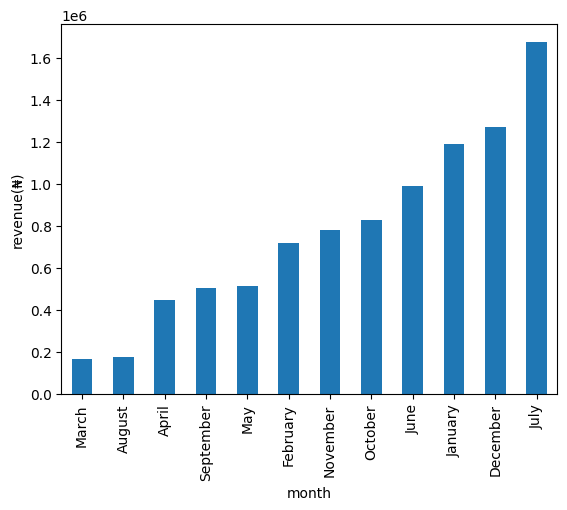

In [327]:
# plotting the chart for 2014 using bar chart in pandas
monthly_revenue_2014.plot(kind="bar", xlabel="month", ylabel="revenue(₦)")

<Axes: xlabel='month', ylabel='revenue(₦)'>

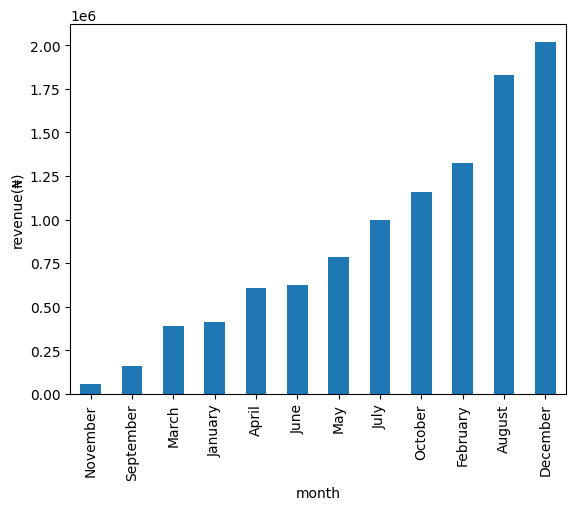

In [328]:
# plotting the chart for 2015 using bar chart in pandas
monthly_revenue_2015.plot(kind="bar", xlabel="month", ylabel="revenue(₦)")

<Axes: xlabel='month', ylabel='revenue(₦)'>

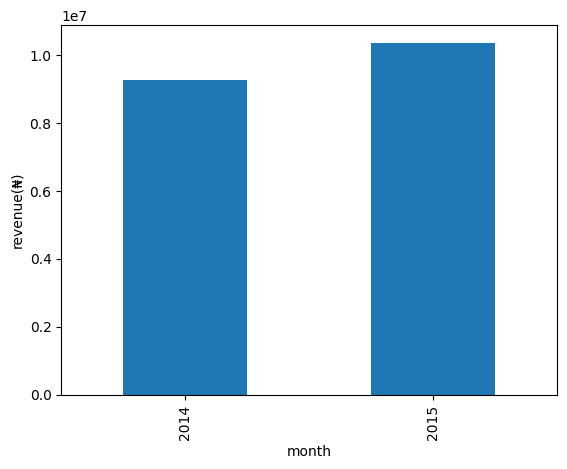

In [329]:
# plotting the chart for 2015 using bar chart in pandas
total_monthly_revenue.plot(kind="bar", xlabel="month", ylabel="revenue(₦)")

`Data Visualization for Revenue by month using line plot in seaborn`

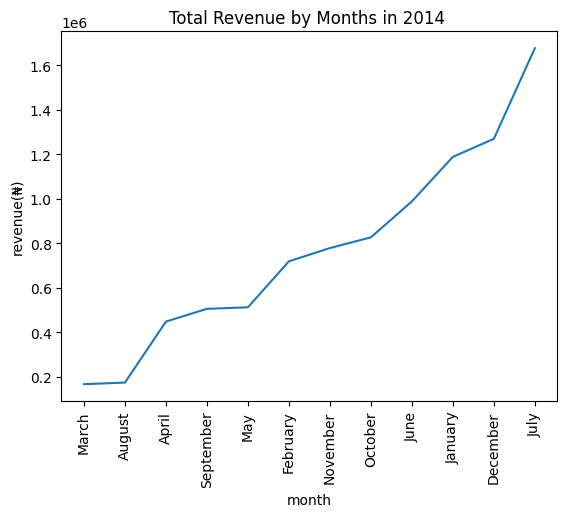

In [330]:
# plotting total revenue by month line plot using seaborn
sns.lineplot(x= monthly_revenue_2014.index, y= monthly_revenue_2014.values)
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Months in 2014 ")
plt.xticks(rotation = 90)
plt.show()


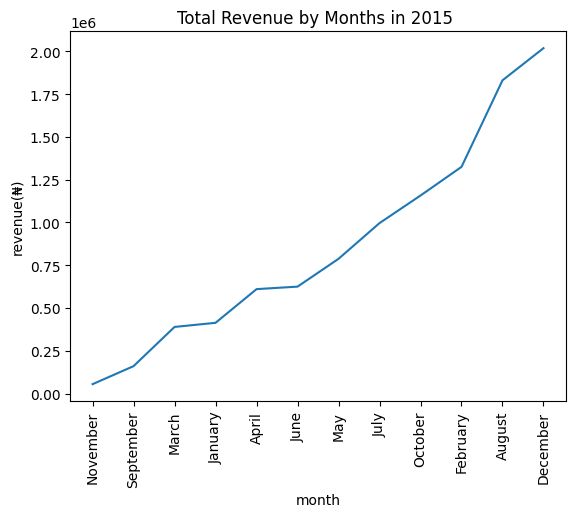

In [331]:
# plotting total revenue by month line plot using seaborn
sns.lineplot(x= monthly_revenue_2015.index, y= monthly_revenue_2015.values)
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Months in 2015 ")
plt.xticks(rotation = 90)
plt.show()


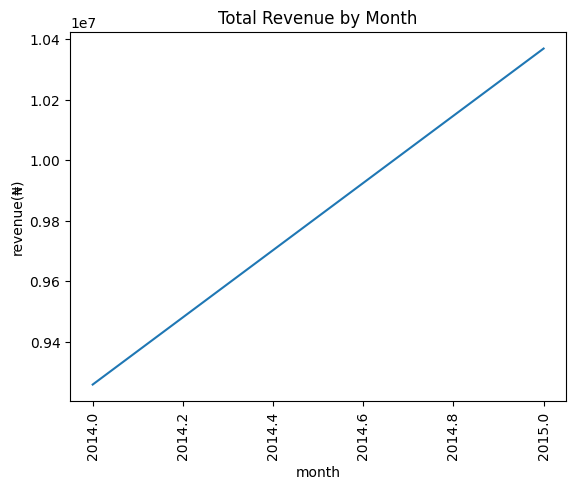

In [332]:
# plotting total revenue by month line plot using seaborn
sns.lineplot(x= total_monthly_revenue.index, y= total_monthly_revenue.values)
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Month")
plt.xticks(rotation = 90)
plt.show()


`Data Visualization for revenue by months using bar charts in matplotlib`

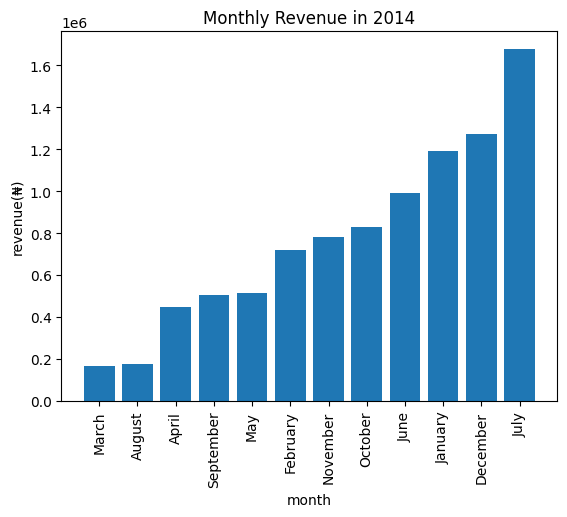

In [333]:
# plotting the chart for 2014 using matplotlib
plt.bar(monthly_revenue_2014.index, monthly_revenue_2014.values)
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Monthly Revenue in 2014")
plt.xticks(rotation = 90)
plt.show()

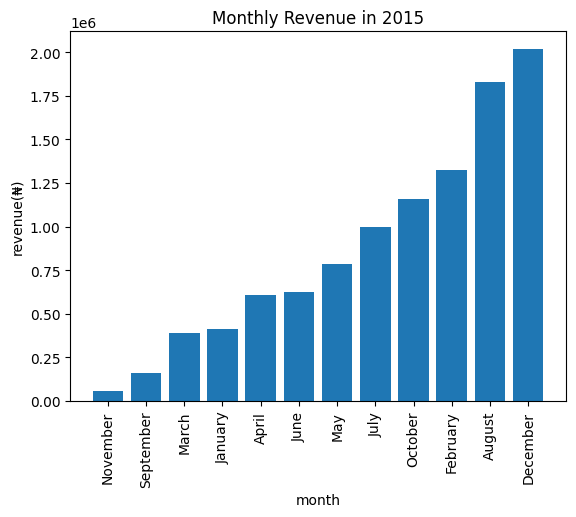

In [334]:
# plotting the chart for 2015 using matplotlib
plt.bar(monthly_revenue_2015.index, monthly_revenue_2015.values)
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Monthly Revenue in 2015")
plt.xticks(rotation = 90)
plt.show()

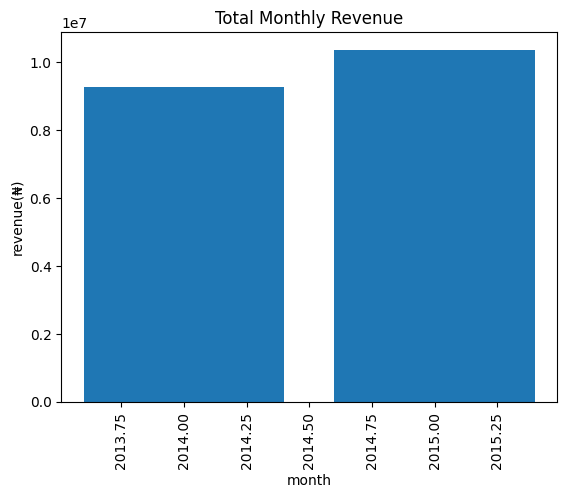

In [335]:
# plotting total revenue by month bar chart using matplotlib
plt.bar(total_monthly_revenue.index, total_monthly_revenue.values)
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Total Monthly Revenue")
plt.xticks(rotation = 90)
plt.show()

## **Total Revenue by Year** ##

In [336]:
# using .sort_values to arrange the output based on the values for 2014 and 2015
total_yearly_revenue = e_sales.groupby("year")["revenue(₦)"].sum().sort_values(ascending=True)
print(f"Total Revenue:\n{total_yearly_revenue}")

Total Revenue:
year
2014     9258340.0
2015    10369540.0
Name: revenue(₦), dtype: float64


 `Data Visualization for Total Revenue by year using pie chart in pandas`

<Axes: ylabel='revenue(₦)'>

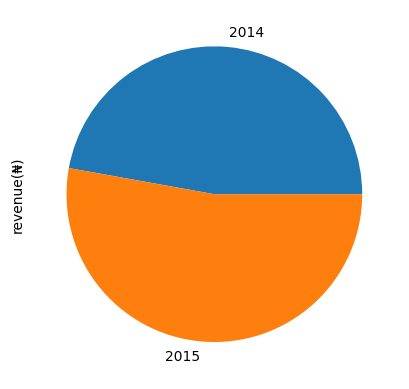

In [337]:
# plotting the pie chart for the total revenue using pie chart pandas
total_yearly_revenue.plot(kind = "pie")


## **Total Revenue by Branch**

In [338]:
# checking the number and list of electronic branches in the dataset
no_of_branches= e_sales["branch"].nunique()
name_branches= e_sales["branch"].unique()
print(f"There are {no_of_branches} electronic stores located in {name_branches}")

There are 3 electronic stores located in ['Woji' 'GRA' 'Town']


In [339]:
# calculating the branch revenue for 2014
branch_revenue_2014= e_sales_2014.groupby("branch")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"The Total Revenue generated in each Branch  in 2014:\n{branch_revenue_2014} ")

The Total Revenue generated in each Branch  in 2014:
branch
Town     231120.0
Woji    3833510.0
GRA     5193710.0
Name: revenue(₦), dtype: float64 


In [340]:
# calculating the branch revenue for 2015
branch_revenue_2015= e_sales_2015.groupby("branch")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"The Total Revenue generated in each Branch  in 2015:\n{branch_revenue_2015} ")

The Total Revenue generated in each Branch  in 2015:
branch
GRA      808380.0
Town    2255600.0
Woji    7305560.0
Name: revenue(₦), dtype: float64 


In [341]:
# calculating total revenue by branch
total_revenue_by_branch= e_sales.groupby("branch")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"The Total Revenue by Branch  in ascending order is:\n{total_revenue_by_branch} ")

The Total Revenue by Branch  in ascending order is:
branch
Town     2486720.0
GRA      6002090.0
Woji    11139070.0
Name: revenue(₦), dtype: float64 


`Date Visualization for revenue by branch using matplotlib`

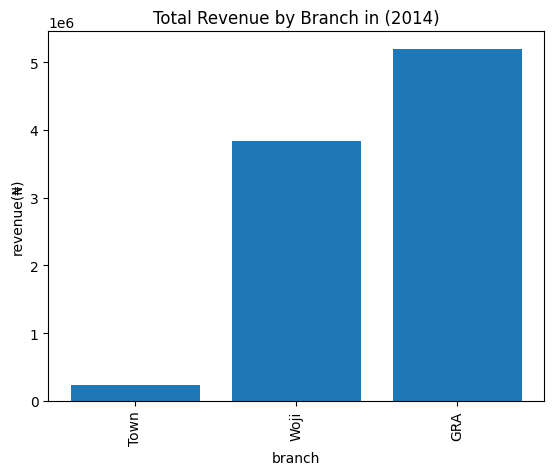

In [342]:
# plotting total revenue by month bar chart using matplotlib
plt.bar(branch_revenue_2014.index, branch_revenue_2014.values)
plt.xlabel("branch")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Branch in (2014)")
plt.xticks(rotation = 90)
plt.show()

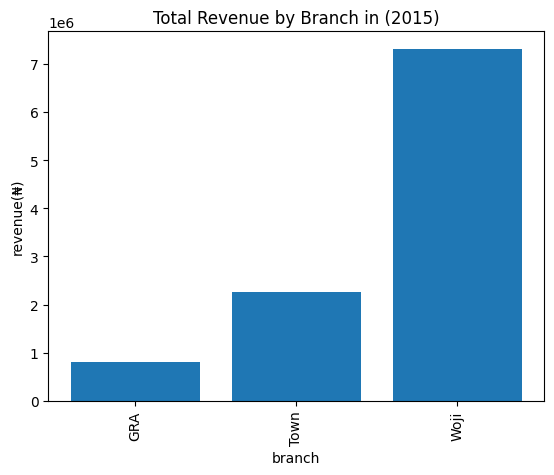

In [343]:
# plotting total revenue by brancch bar chart using matplotlib
plt.bar(branch_revenue_2015.index, branch_revenue_2015.values)
plt.xlabel("branch")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Branch in (2015)")
plt.xticks(rotation = 90)
plt.show()

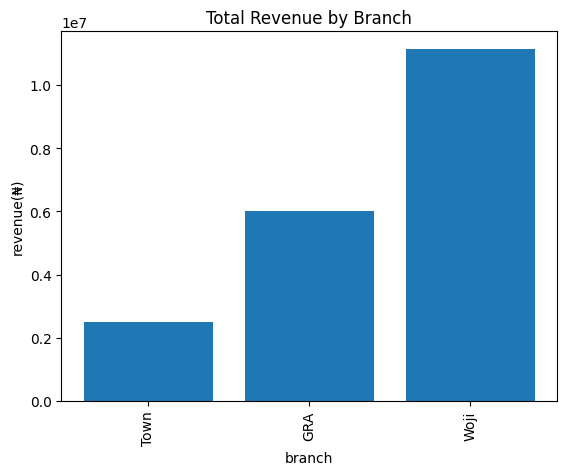

In [344]:
# plotting total revenue by branch bar chart using matplotlib
plt.bar(total_revenue_by_branch.index, total_revenue_by_branch.values)
plt.xlabel("branch")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Branch")
plt.xticks(rotation = 90)
plt.show()

`Data Visualization for Total Revenue by branch using pie chart in matplotlib` 

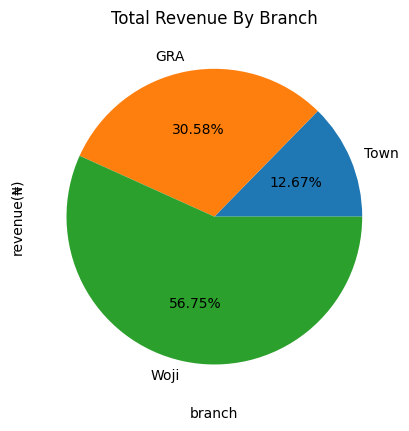

In [345]:
# plotting the pie chart for Total Revenue by branch using matplotlib

plt.pie(total_revenue_by_branch.values, labels= total_revenue_by_branch.index, autopct= "%1.2f%%")
plt.xlabel("branch")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue By Branch")
plt.show()


## **Total Revenue by Products**

In [346]:
# checking the list of products available
# checking the number and list of electronic branches in the dataset
no_of_products= e_sales["products"].nunique()
product_names= e_sales["products"].unique()
print(f"There are {no_of_products} number of products sold in all the branches{product_names}")


There are 5 number of products sold in all the branches['Apple' 'Lenovo' 'HP' 'Compaq' 'Dell']


In [347]:

# calculating the revenue by product sales in 2014
revenue_by_product_2014 = e_sales_2014.groupby("products")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"Revenue by products (2014):\n{revenue_by_product_2014} ")

Revenue by products (2014):
products
Apple      250000.0
Compaq    1414940.0
Lenovo    1908340.0
Dell      1918140.0
HP        3766920.0
Name: revenue(₦), dtype: float64 


In [348]:

# calculating the revenue by product sales in 2015
revenue_by_product_2015 = e_sales_2015.groupby("products")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"Revenue by products (2015):\n{revenue_by_product_2015} ")

Revenue by products (2015):
products
Lenovo     226800.0
Compaq     630280.0
Apple     1450000.0
Dell      2251730.0
HP        5810730.0
Name: revenue(₦), dtype: float64 


In [349]:

# calculating the total revenue by product sales
total_revenue_by_product = e_sales.groupby("products")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"Total Revenue by products:\n{total_revenue_by_product} ")


Total Revenue by products:
products
Apple     1700000.0
Compaq    2045220.0
Lenovo    2135140.0
Dell      4169870.0
HP        9577650.0
Name: revenue(₦), dtype: float64 


`Data Visualization of Total Revenue by Product using bar chart in matplotlib`

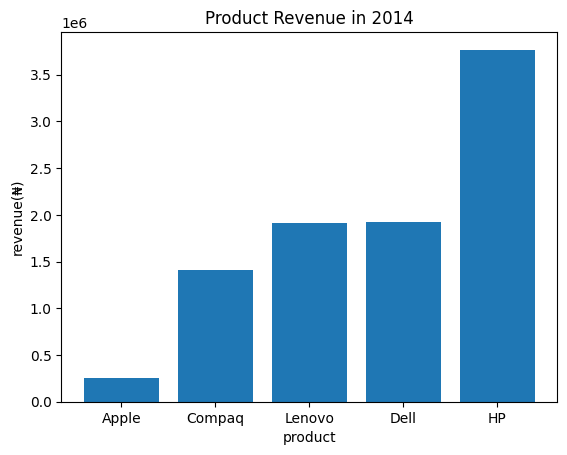

In [350]:
# plotting the chart for revenue by product
plt.bar(revenue_by_product_2014.index, revenue_by_product_2014.values)
plt.xlabel("product")
plt.ylabel("revenue(₦)")
plt.title("Product Revenue in 2014")
plt.xticks(rotation = 0)
plt.show()

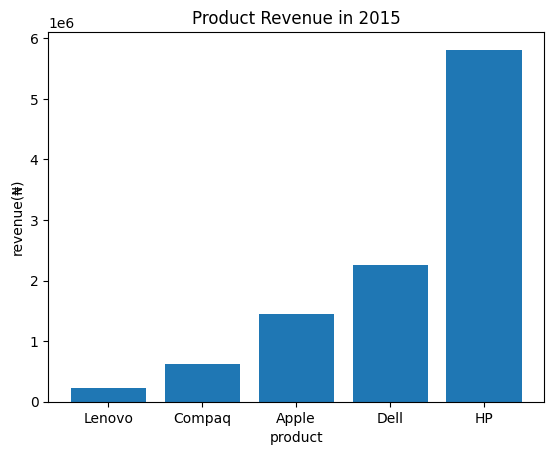

In [351]:
# plotting the chart for revenue by product
plt.bar(revenue_by_product_2015.index, revenue_by_product_2015.values)
plt.xlabel("product")
plt.ylabel("revenue(₦)")
plt.title("Product Revenue in 2015")
plt.xticks(rotation = 0)
plt.show()

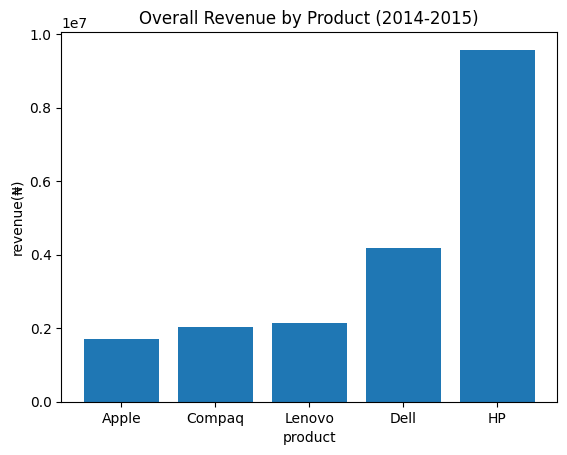

In [352]:
# plotting the chart for revenue by product
plt.bar(total_revenue_by_product.index, total_revenue_by_product.values)
plt.xlabel("product")
plt.ylabel("revenue(₦)")
plt.title("Overall Revenue by Product (2014-2015)")
plt.xticks(rotation = 0)
plt.show()

`Data Visualization for Total Revenue using pie chart in matplotlib` 

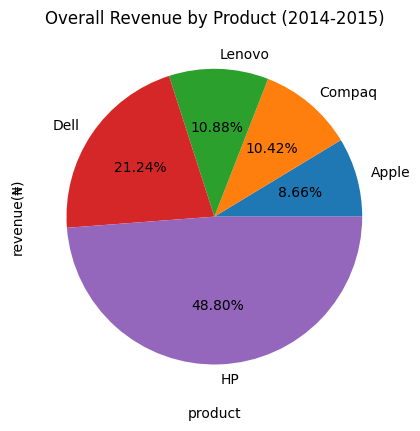

In [353]:
# plotting the pie chart for total revenue by branch using matplotlib

plt.pie(total_revenue_by_product.values, labels=total_revenue_by_product.index, autopct = "%1.2f%%")
plt.xlabel("product")
plt.ylabel("revenue(₦)")
plt.title("Overall Revenue by Product (2014-2015)")
plt.show()

## **Total Revenue by Sales Agent**

In [354]:

# checking the number and list of sales agents in the data set
no_of_sales_agent= e_sales["sales_agent"].nunique()
agent_names= e_sales["sales_agent"].unique()
print(f"There are {no_of_sales_agent} Sales Agents across all the branches, Their names are:\n{agent_names}")


There are 11 Sales Agents across all the branches, Their names are:
['Chinedu' 'Emeka' 'Ibrahim' 'Tolu' 'Tonye' 'George' 'Blessing' 'Chioma'
 'Torbari' 'Uche' 'Tunde']


In [355]:
# getting the revenue by sales agent in 2014
revenue_by_sales_agent_2014= e_sales_2014.groupby("sales_agent")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"This is the Total Revenue by Sales Agents:\n{revenue_by_sales_agent_2014} ")

This is the Total Revenue by Sales Agents:
sales_agent
Torbari       57710.0
Tunde         63680.0
Tonye        149250.0
Uche         167440.0
Chinedu      336430.0
Ibrahim      539730.0
Tolu         628740.0
George       700820.0
Emeka       1478540.0
Blessing    2033700.0
Chioma      3102300.0
Name: revenue(₦), dtype: float64 


In [356]:
# getting the revenue by sales agent in 2015
revenue_by_sales_agent_2015= e_sales_2015.groupby("sales_agent")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"This is the Total Revenue by Sales Agents:\n{revenue_by_sales_agent_2015} ")

This is the Total Revenue by Sales Agents:
sales_agent
Tonye        289120.0
Blessing     329340.0
Torbari      479040.0
George       686950.0
Uche        1116170.0
Tunde       1139430.0
Ibrahim     1210140.0
Chinedu     1305000.0
Emeka       1630900.0
Tolu        2183450.0
Name: revenue(₦), dtype: float64 


In [357]:
# getting the total revenue by sales agent
total_revenue_by_sales_agent= e_sales.groupby("sales_agent")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"This is the Total Revenue by Sales Agents:\n{total_revenue_by_sales_agent} ")

This is the Total Revenue by Sales Agents:
sales_agent
Tonye        438370.0
Torbari      536750.0
Tunde       1203110.0
Uche        1283610.0
George      1387770.0
Chinedu     1641430.0
Ibrahim     1749870.0
Blessing    2363040.0
Tolu        2812190.0
Chioma      3102300.0
Emeka       3109440.0
Name: revenue(₦), dtype: float64 


`Data Visualization of Revenue by Sales Agents using seaborn`

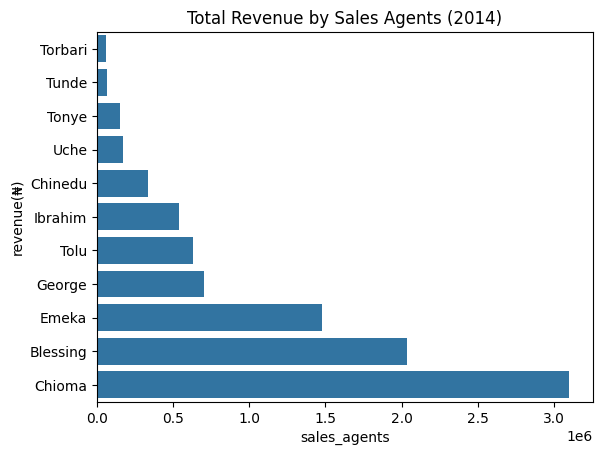

In [358]:
# plotting the bar chart of total revenue by sales agent using seaborn
sns.barplot(x= revenue_by_sales_agent_2014.values, y=revenue_by_sales_agent_2014.index, orient = "h")
plt.xlabel("sales_agents")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Sales Agents (2014)")
plt.show()

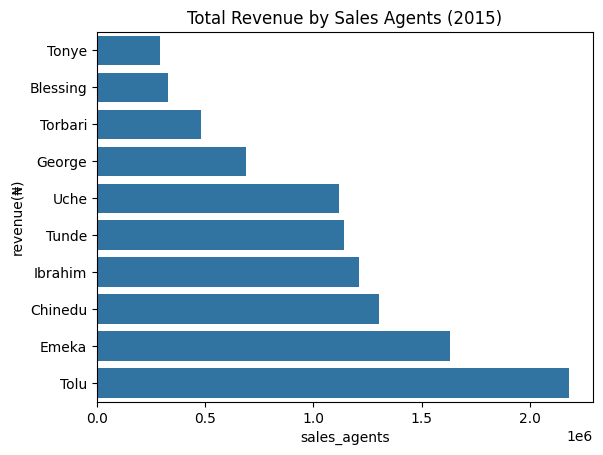

In [359]:
# plotting the bar chart of total revenue by sales agent using seaborn
sns.barplot(x= revenue_by_sales_agent_2015.values, y=revenue_by_sales_agent_2015.index, orient = "h")
plt.xlabel("sales_agents")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Sales Agents (2015)")
plt.show()

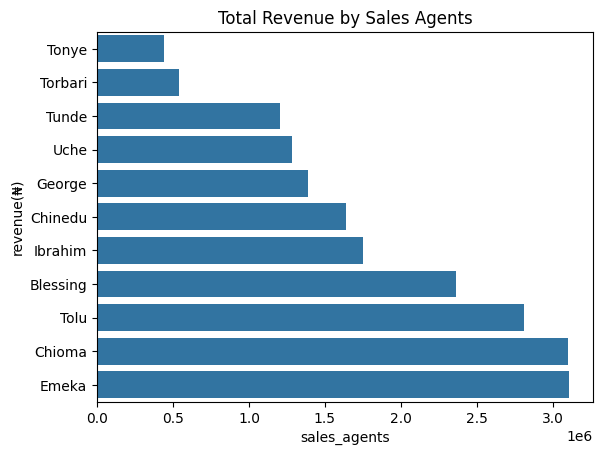

In [360]:
# plotting the bar chart of total revenue by sales agent using seaborn
sns.barplot(x= total_revenue_by_sales_agent.values, y=total_revenue_by_sales_agent.index, orient = "h")
plt.xlabel("sales_agents")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Sales Agents")
plt.show()

## **Total Revenue by Week** ## 

In [361]:
# total revenue by week in 2014
revenue_by_week_2014 = e_sales_2014.groupby("week_day")["revenue(₦)"].sum().sort_values(ascending = False)
print(f"Total Revenue by Week Day(2014):\n{revenue_by_week_2014}")


Total Revenue by Week Day(2014):
week_day
Tuesday      2397630.0
Monday       2071410.0
Wednesday    1564190.0
Thursday     1319020.0
Sunday        970760.0
Saturday      525000.0
Friday        410330.0
Name: revenue(₦), dtype: float64


In [362]:
# total revenue by week in 2015
revenue_by_week_2015 = e_sales_2015.groupby("week_day")["revenue(₦)"].sum().sort_values(ascending = False)
print(f"Total Revenue by Week Day(2015):\n{revenue_by_week_2015}")


Total Revenue by Week Day(2015):
week_day
Friday       3016300.0
Sunday       2175440.0
Wednesday    1784390.0
Monday       1443760.0
Tuesday       991340.0
Thursday      490940.0
Saturday      467370.0
Name: revenue(₦), dtype: float64


In [363]:
# total revenue by week
total_revenue_by_week = e_sales.groupby("week_day")["revenue(₦)"].sum().sort_values(ascending = False)
print(f"Total Revenue by Week Day:\n{total_revenue_by_week}")


Total Revenue by Week Day:
week_day
Monday       3515170.0
Friday       3426630.0
Tuesday      3388970.0
Wednesday    3348580.0
Sunday       3146200.0
Thursday     1809960.0
Saturday      992370.0
Name: revenue(₦), dtype: float64


`Data Visualization for Revenue by week using  line plot in matplotlib`

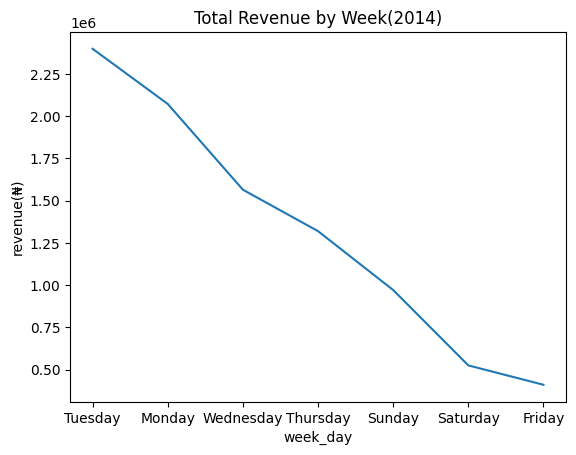

In [364]:
# plotting total revenue by week (2015) using matplotlib
plt.plot(revenue_by_week_2014.index, revenue_by_week_2014.values)
plt.xlabel("week_day")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Week(2014)")
plt.show()

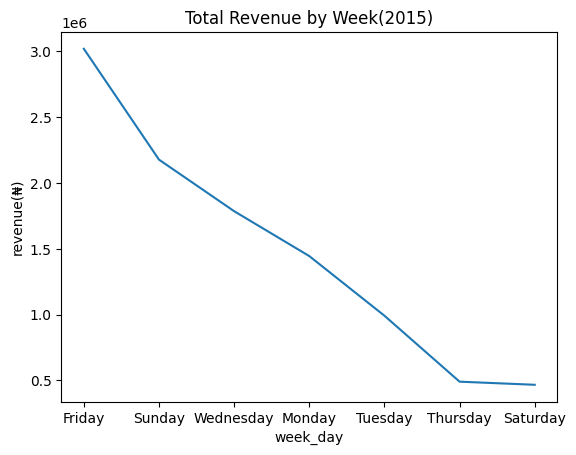

In [365]:
# plotting total revenue by week(2015) using matplotlib
plt.plot(revenue_by_week_2015.index, revenue_by_week_2015.values)
plt.xlabel("week_day")
plt.ylabel("revenue(₦)")
plt.title("Total Revenue by Week(2015)")
plt.show()

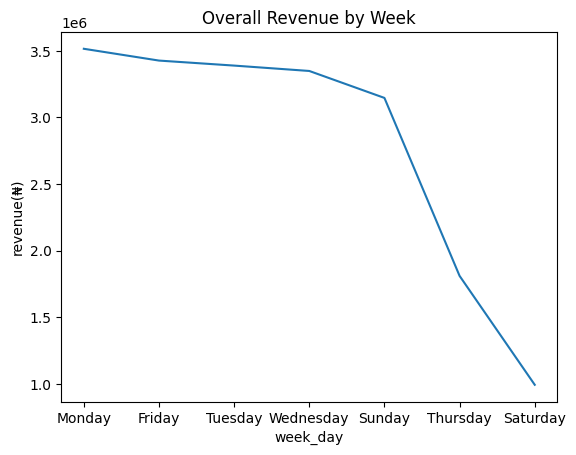

In [366]:
# plotting total revenue by week using matplotlib
plt.plot(total_revenue_by_week.index, total_revenue_by_week.values)
plt.xlabel("week_day")
plt.ylabel("revenue(₦)")
plt.title("Overall Revenue by Week")
plt.show()

## **Sales Trends Over the Years** ##

In [367]:
# checking the sales trend in 2014
sales_trend_2014 = e_sales_2014.groupby(["year", "month"])["revenue(₦)"].sum().reset_index()
print("The sales trend for 2014:\n", sales_trend_2014)

The sales trend for 2014:
     year      month  revenue(₦)
0   2014      April    448650.0
1   2014     August    174650.0
2   2014   December   1269690.0
3   2014   February    719370.0
4   2014    January   1188550.0
5   2014       July   1676900.0
6   2014       June    988500.0
7   2014      March    167440.0
8   2014        May    512780.0
9   2014   November    778890.0
10  2014    October    827080.0
11  2014  September    505840.0


In [ ]:
# checking the sales trend in 2015
sales_trend_2015 = e_sales_2015.groupby(["year", "month"])["revenue(₦)"].sum().reset_index()
print("The sales trend for 2015:\n", sales_trend_2015)


The sales trend for 2015:
     year      month  revenue(₦)
0   2014      April    448650.0
1   2014     August    174650.0
2   2014   December   1269690.0
3   2014   February    719370.0
4   2014    January   1188550.0
5   2014       July   1676900.0
6   2014       June    988500.0
7   2014      March    167440.0
8   2014        May    512780.0
9   2014   November    778890.0
10  2014    October    827080.0
11  2014  September    505840.0


In [369]:
# checking the trends of sales
sales_trend = e_sales.groupby(["year", "month"])["revenue(₦)"].sum().reset_index()
sales_trend

,year,month,revenue(₦)
0,2014,April,448650.0
1,2014,August,174650.0
2,2014,December,1269690.0
3,2014,February,719370.0
4,2014,January,1188550.0
5,2014,July,1676900.0
6,2014,June,988500.0
7,2014,March,167440.0
8,2014,May,512780.0
9,2014,November,778890.0


`Data Visualization for sales trend using line plot in matplotlib`

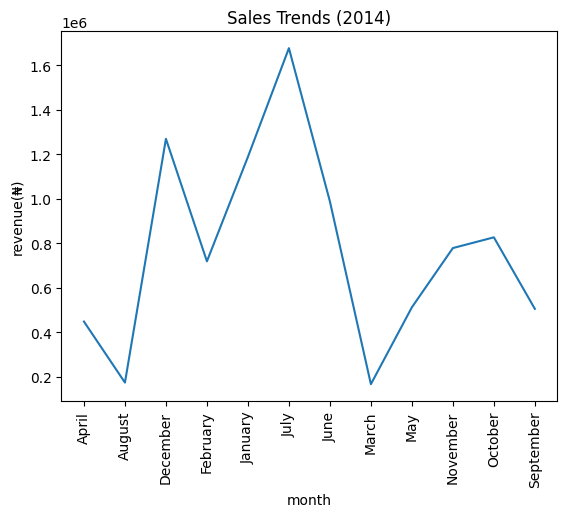

In [377]:
# using matplotlib
plt.plot(sales_trend_2014["month"], sales_trend_2014["revenue(₦)"])
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.xticks(rotation= 90)
plt.title("Sales Trends (2014)")
plt.show()

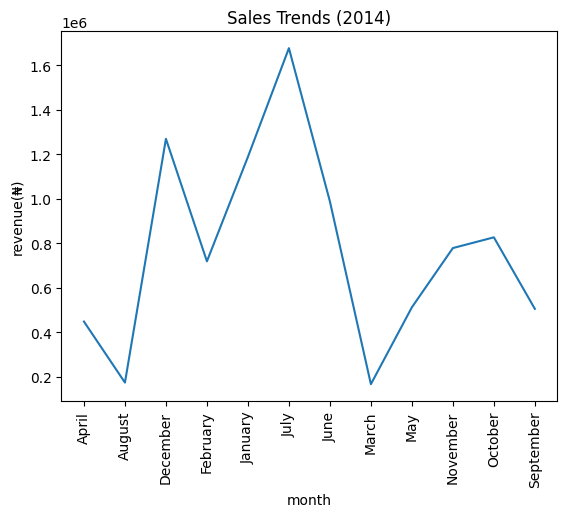

In [378]:
# using matplotlib
plt.plot(sales_trend_2015["month"], sales_trend_2015["revenue(₦)"])
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Sales Trends (2014)")
plt.xticks(rotation= 90)
plt.show()

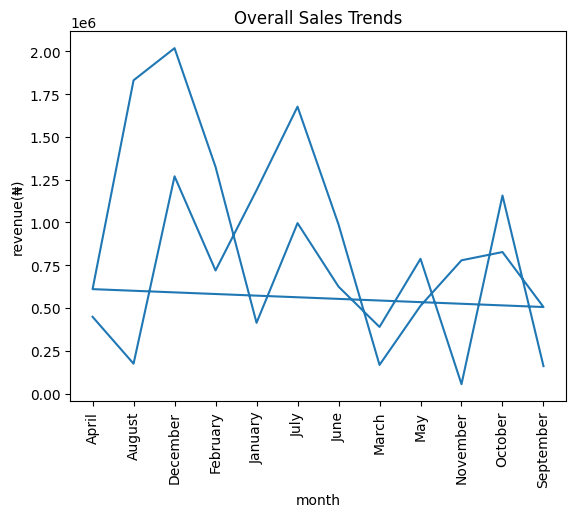

In [376]:
# using matplotlib
plt.plot(sales_trend["month"], sales_trend["revenue(₦)"])
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Overall Sales Trends")
plt.xticks(rotation= 90)
plt.show()

## **Saving the Data to Excel** ##

In [383]:
# saving the cleaned data to the excel file
e_sales_cleaned_data = e_sales.to_excel("e_sales_cleaned_data.xlsx", index= True)
e_sales_cleaned_data